In [22]:
import pandas as pd # for data manipulation
import numpy as np # for numerical analysis
import seaborn as sns # for making graphs
import matplotlib.pyplot as plt # for making graphs

In [6]:
# read in the clean data
loans_data_clean = pd.read_csv("../data/clean_data/lending_club_loans_cleaned.csv")
# make a working copy
df = loans_data_clean.copy()

In [12]:
df.shape

(40869, 14)

In [11]:
df.head()

,defaulted,loan_amnt,term,int_rate,sub_grade,dti,fico,pub_rec,emp_length,home_ownership,verification_status,addr_state,annual_inc,issue_yr
0,False,5000.0,36 months,10.65,B2,27.65,735.0,0,10+ years,RENT,Verified,AZ,24000,2011
1,True,2500.0,60 months,15.27,C4,1.00,740.0,0,< 1 year,RENT,Source Verified,GA,30000,2011
2,False,2400.0,36 months,15.96,C5,8.72,735.0,0,10+ years,RENT,Not Verified,IL,12252,2011
3,False,10000.0,36 months,13.49,C1,20.00,690.0,0,10+ years,RENT,Source Verified,CA,49200,2011
4,False,5000.0,36 months,7.90,A4,11.20,730.0,0,3 years,RENT,Source Verified,AZ,36000,2011


In [13]:
df.info

<bound method DataFrame.info of        defaulted  loan_amnt       term  int_rate sub_grade    dti   fico  \
0          False     5000.0  36 months     10.65        B2  27.65  735.0   
1           True     2500.0  60 months     15.27        C4   1.00  740.0   
2          False     2400.0  36 months     15.96        C5   8.72  735.0   
3          False    10000.0  36 months     13.49        C1  20.00  690.0   
4          False     5000.0  36 months      7.90        A4  11.20  730.0   
...          ...        ...        ...       ...       ...    ...    ...   
40864      False     5350.0  36 months     13.12        D5  15.00  660.0   
40865      False    10000.0  36 months     14.70        E5   7.22  650.0   
40866      False     2000.0  36 months      7.12        A1   5.60  800.0   
40867      False     6000.0  36 months     10.59        C2  12.90  695.0   
40868      False     4400.0  36 months      9.64        B4   3.72  695.0   

       pub_rec emp_length home_ownership verification_s

In [ ]:
# checking there are no null values
print(df.isnull().sum())

In [16]:
df.describe(include = "all")

,defaulted,loan_amnt,term,int_rate,sub_grade,dti,fico,pub_rec,emp_length,home_ownership,verification_status,addr_state,annual_inc,issue_yr
count,40869,40869.000000,40869,40869.000000,40869,40869.000000,40869.000000,40869.000000,40869,40869,40869,40869,4.086900e+04,40869.000000
unique,2,NaN,2,NaN,35,NaN,NaN,NaN,11,5,3,50,NaN,NaN
top,False,NaN,36 months,NaN,B3,NaN,NaN,NaN,10+ years,RENT,Not Verified,CA,NaN,NaN
freq,34702,NaN,30670,NaN,2869,NaN,NaN,NaN,9184,19538,18207,7164,NaN,NaN
mean,NaN,11071.230639,NaN,12.157134,NaN,13.364868,712.701069,0.056865,NaN,NaN,NaN,NaN,6.966786e+04,2010.211603
std,NaN,7351.270131,NaN,3.682448,NaN,6.715654,36.058933,0.243434,NaN,NaN,NaN,NaN,6.477603e+04,0.972184
min,NaN,500.000000,NaN,5.420000,NaN,0.000000,610.000000,0.000000,NaN,NaN,NaN,NaN,1.896000e+03,2007.000000
25%,NaN,5300.000000,NaN,9.630000,NaN,8.200000,685.000000,0.000000,NaN,NaN,NaN,NaN,4.100000e+04,2010.000000
50%,NaN,9750.000000,NaN,11.990000,NaN,13.470000,710.000000,0.000000,NaN,NaN,NaN,NaN,6.000000e+04,2011.000000
75%,NaN,15000.000000,NaN,14.720000,NaN,18.650000,740.000000,0.000000,NaN,NaN,NaN,NaN,8.300400e+04,2011.000000


In [17]:
df.columns

Index(['defaulted', 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'dti',
       'fico', 'pub_rec', 'emp_length', 'home_ownership',
       'verification_status', 'addr_state', 'annual_inc', 'issue_yr'],
      dtype='object')

## Descriptive analysis and visualisation of the variables

###  Loan characteristics

* 'defaulted' (Y/N)
* 'loan_amnt'
* 'term' (36 or 60 months)
* 'issue_d' 
* 'int_rate'

In [19]:
(df['defaulted'].value_counts() / df['defaulted'].count()) * 100

False    84.910323
True     15.089677
Name: defaulted, dtype: float64

In [21]:
# make a histogram of loan amount?
df['loan_amnt'].describe()

count    40869.000000
mean     11071.230639
std       7351.270131
min        500.000000
25%       5300.000000
50%       9750.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

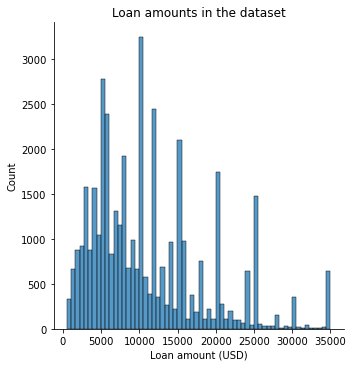

<Figure size 432x288 with 0 Axes>

In [77]:
# Display a Seaborn distplot of the loan amounts
sns.displot(df['loan_amnt']).set(title='Loan amounts in the dataset')
# Label the axes
plt.xlabel('Loan amount (USD)')

plt.show() 
# Clear the distplot 
plt.clf() 

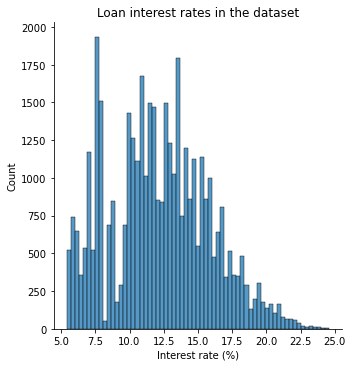

<Figure size 432x288 with 0 Axes>

In [40]:
# Display a Seaborn distplot of the loan amounts
sns.displot(df['int_rate']).set(title='Loan interest rates in the dataset')
# Label the axes
plt.xlabel('Interest rate (%)')

plt.show() 
# Clear the distplot 
plt.clf() 

In [68]:
# 75% loans are 36 months (i.e. 3 years, otherwise 5 years)
df['term'].value_counts() / df['term'].count()

36 months    0.750447
60 months    0.249553
Name: term, dtype: float64

In [70]:
# half the loans in the dataset were originated in 2011
df['issue_yr'].value_counts() / len(df['issue_yr'])

2011    0.500061
2010    0.298123
2009    0.129218
2008    0.058553
2007    0.014045
Name: issue_yr, dtype: float64

In [71]:
# use groupby to show proportion of defaulted by issue year
df.groupby(df['issue_yr'])['defaulted'].mean()

issue_yr
2007    0.270035
2008    0.207271
2009    0.136906
2010    0.136819
2011    0.152958
Name: defaulted, dtype: float64

###  Credit risk indicators

* 'sub_grade'
* 'dti'
* 'fico'
* 'pub_rec'

In [73]:
# proportion of defaulted by LC subgrade
df.groupby(df['sub_grade'])['defaulted'].mean()

sub_grade
A1    0.022770
A2    0.048966
A3    0.051429
A4    0.059659
A5    0.078410
B1    0.093557
B2    0.109847
B3    0.119205
B4    0.135946
B5    0.135793
C1    0.157654
C2    0.166107
C3    0.182614
C4    0.175492
C5    0.180354
D1    0.190751
D2    0.214336
D3    0.226624
D4    0.230769
D5    0.252058
E1    0.269637
E2    0.262533
E3    0.239370
E4    0.295880
E5    0.255717
F1    0.295699
F2    0.288591
F3    0.301310
F4    0.375635
F5    0.462585
G1    0.316176
G2    0.358491
G3    0.376623
G4    0.333333
G5    0.329412
Name: defaulted, dtype: float64

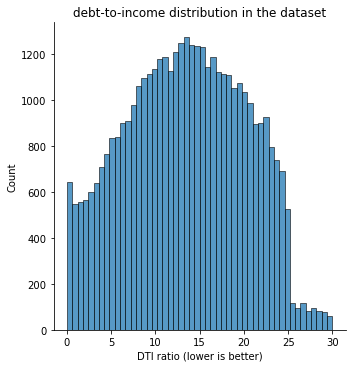

<Figure size 432x288 with 0 Axes>

In [74]:
# Display a Seaborn distplot of the loan amounts
sns.displot(df['dti']).set(title='debt-to-income distribution in the dataset')
# Label the axes
plt.xlabel('DTI ratio (lower is better)')

plt.show() 
# Clear the distplot 
plt.clf() 

In [80]:
# vast majority of borrowers have no public derogatory terms
df['pub_rec'].value_counts() / len(df['pub_rec'])

0    0.945386
1    0.052803
2    0.001468
3    0.000269
4    0.000049
5    0.000024
Name: pub_rec, dtype: float64

In [81]:
# proportion of defaulted by public derogatory terms
# considering the average default rate is 15% in the dataset, there seems to be some explanatory power from borrowers 
# with one or more public derogatory terms
df.groupby(df['pub_rec'])['defaulted'].mean()

pub_rec
0    0.145974
1    0.238647
2    0.200000
3    0.000000
4    0.000000
5    0.000000
Name: defaulted, dtype: float64

###  Demographic variables

* 'emp_length'
* 'home_ownership'
* 'verification_status'
* 'addr_state'
* 'annual_inc'

In [18]:
# do a bar chart of 'verification_status'
# maybe do bar charts showing, of those who repaid, and of those charged-off, showing verification status proprortions
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [50]:
df['verification_status'].value_counts()
# df.groupby(['verification_status'])

Not Verified       18207
Verified           12697
Source Verified     9965
Name: verification_status, dtype: int64

In [84]:
df
#ax = sns.babrplot(x="['verification_status']", hue="defaulted", data=df)

,defaulted,loan_amnt,term,int_rate,sub_grade,dti,fico,pub_rec,emp_length,home_ownership,verification_status,addr_state,annual_inc,issue_yr
0,False,5000.0,36 months,10.65,B2,27.65,735.0,0,10+ years,RENT,Verified,AZ,24000,2011
1,True,2500.0,60 months,15.27,C4,1.00,740.0,0,< 1 year,RENT,Source Verified,GA,30000,2011
2,False,2400.0,36 months,15.96,C5,8.72,735.0,0,10+ years,RENT,Not Verified,IL,12252,2011
3,False,10000.0,36 months,13.49,C1,20.00,690.0,0,10+ years,RENT,Source Verified,CA,49200,2011
4,False,5000.0,36 months,7.90,A4,11.20,730.0,0,3 years,RENT,Source Verified,AZ,36000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40864,False,5350.0,36 months,13.12,D5,15.00,660.0,0,1 year,OWN,Not Verified,NJ,4000,2007
40865,False,10000.0,36 months,14.70,E5,7.22,650.0,0,1 year,RENT,Not Verified,GA,50000,2007
40866,False,2000.0,36 months,7.12,A1,5.60,800.0,0,7 years,MORTGAGE,Not Verified,CT,150000,2007
40867,False,6000.0,36 months,10.59,C2,12.90,695.0,0,< 1 year,RENT,Not Verified,CT,20000,2007


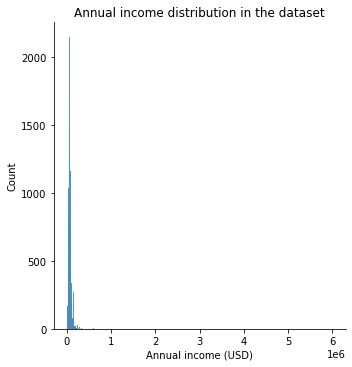

<Figure size 432x288 with 0 Axes>

In [76]:
# Display a Seaborn distplot of income
sns.displot(df['annual_inc']).set(title='Annual income distribution in the dataset')
# Label the axes
plt.xlabel('Annual income (USD)')

plt.show() 
# Clear the distplot 
plt.clf() 

In [94]:
# attempt to filter the data to exclude unverified high income data, which is skewing the data
df[df['annual_inc'] >= 1000000][df['verification_status'] != 'Verified'].count()

<ipython-input-94-1eb59686c95e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['annual_inc'] >= 1000000][df['verification_status'] != 'Verified'].count()


defaulted              13
loan_amnt              13
term                   13
int_rate               13
sub_grade              13
dti                    13
fico                   13
pub_rec                13
emp_length             13
home_ownership         13
verification_status    13
addr_state             13
annual_inc             13
issue_yr               13
dtype: int64